In [5]:
import numpy as np
import pandas as pd
import latexify
import matplotlib.pyplot as plt

from sklearn import metrics
from plotly import graph_objects as go
from matplotlib.widgets import Slider

# Setup plots display
plt.style.use('fivethirtyeight')
%matplotlib widget

%config InlineBackend.figure_format = "retina"

# Setup

## Plotting utils

### Plotly

In [6]:
plotly_common_layout = dict(
    margin=dict(l=20, r=10, b=20, t=10),
    font_size=16,
    showlegend=False,
    )

### Matplotlib

In [7]:
def close_prev_figures():
    """Close all previous figures to clean up memory."""
    fignums = plt.get_fignums()
    if fignums:
        for fignum in fignums:
            plt.close(fignum)

# Problem definition

Say there are two variables which seem to be linearly related (like height and waight etc.). 
\
Meaning, if one variable goes up, so does the other - `positive correlation`, or 
\
if one variable goes up, the other tend to go down - `negative correlation`.


In [8]:
# Generate data
data_w = 1.5
data_b = 10

x_data = np.sort(np.random.choice(np.arange(0, 10, 0.1), size=30, replace=False))
y_data = x_data * data_w + np.random.randn(x_data.size).round(2) + data_b

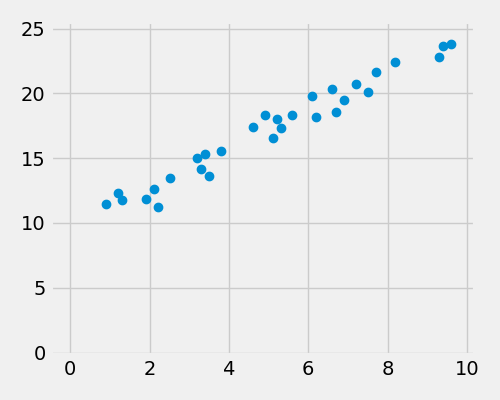

In [9]:
close_prev_figures()
fig, ax = plt.subplots(figsize=(5, 4))
ax.plot(x_data, y_data, 'o')
ax.set_xlim(-0.5, 10.2)
ax.set_ylim(-0.2, 25.5)
plt.tight_layout()
plt.show()


In [10]:
def linear_model(x, w=1, b=0):
    # TODO: add line formula to plots
    y = w * x + b
    return y

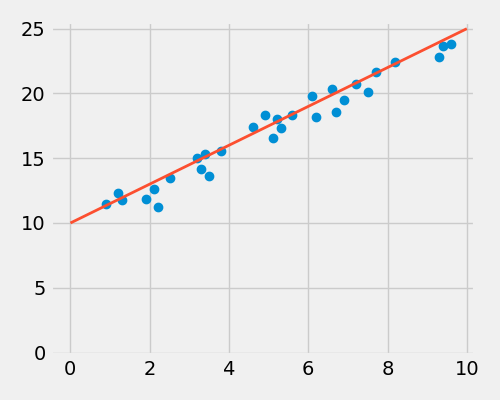

In [12]:
x_line_1 = np.array([0, 10])
y_line_1 = linear_model(x=x_line_1, w=data_w, b=data_b)

close_prev_figures()
fig, ax = plt.subplots(figsize=(5, 4))
ax.plot(
    x_data, y_data, 'o', 
    x_line_1, y_line_1, '-', linewidth=2
)

ax.set_xlim(-0.5, 10.2)
ax.set_ylim(-0.2, 25.5)
plt.tight_layout()
plt.show()

The task is knowing value of one variable predict the value of the second one.
\
To do this we need a way to automatically find best model parameters in this case *weight* and *bias*

# Introducing Linear model (line equation)

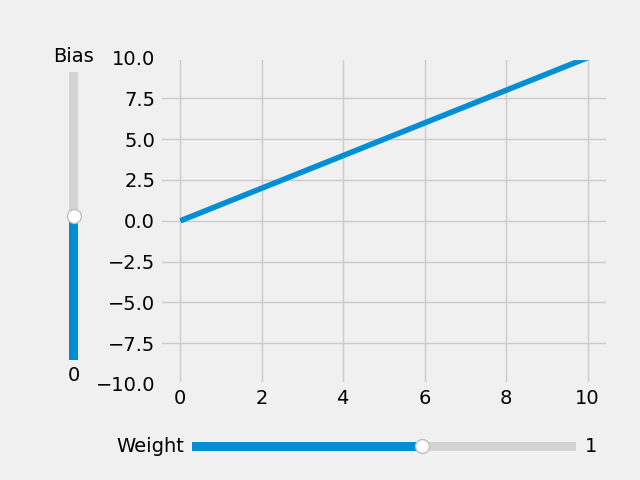

In [13]:
x_line = np.array([0, 10])
init_weight = 1
min_weight = -5
max_weight = 5

init_bias = 0
min_bias = -10
max_bias = 10

fig, ax = plt.subplots()
line, = ax.plot(x_line, linear_model(x=x_line))
ax.set_ylim(min_bias, max_bias)

# Make room for the sliders
fig.subplots_adjust(left=0.25, bottom=0.2)


# SETUP SLIDERS

# Weight slider (horizontal).
w_slider_x = 0.3
w_slider_y = 0.05
w_slider_len = 0.6
w_slider_width = 0.04

ax_weight = fig.add_axes([w_slider_x, w_slider_y, w_slider_len, w_slider_width])
weight_slider = Slider(
    ax=ax_weight,
    label='Weight',
    valmin=min_weight,
    valmax=max_weight,
    valinit=init_weight,
)

# Bias slider (vertical)
b_slider_x = 0.1
b_slider_y = 0.25
b_slider_len = 0.6
b_slider_width = 0.03

ax_bias = fig.add_axes([b_slider_x, b_slider_y, b_slider_width, b_slider_len])
bias_slider = Slider(
    ax=ax_bias,
    label="Bias",
    valmin=min_bias,
    valmax=max_bias,
    valinit=init_bias,
    orientation="vertical"
)

# The function to be called anytime a slider's value changes
def update(val):
    line.set_ydata(linear_model(x_line, w=weight_slider.val, b=bias_slider.val))
    fig.canvas.draw_idle()

# register the update function with each slider
weight_slider.on_changed(update)
bias_slider.on_changed(update)

plt.show()


# Defining `Loss Function`

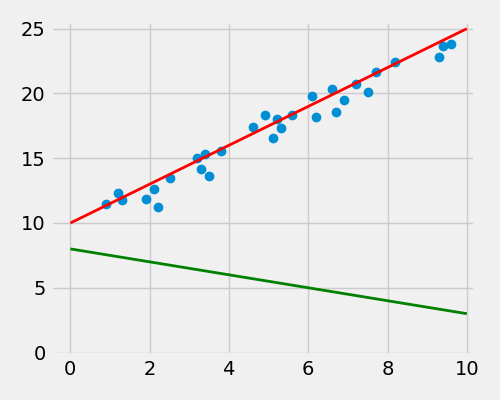

In [14]:
line_2_w = -0.5
line_2_b = 8

x_line_2 = x_line_1
y_line_2 = linear_model(x_line_2, w=line_2_w, b=line_2_b)

close_prev_figures()
fig, ax = plt.subplots(figsize=(5, 4))
ax.plot(
    x_data, y_data, 'o', 
    x_line_1, y_line_1, 'r-',
    x_line_2, y_line_2, 'g-', linewidth=2,
)

ax.set_xlim(-0.5, 10.2)
ax.set_ylim(-0.2, 25.5)
plt.tight_layout()
plt.show()

In order to be able to find best possible line automatically we need to have a measure of how good our line fits the data.
One of the most obvious and easy ways is to sum differences between true and predicted values of the target variable. 

In [15]:
residuals = []
for x_val, y_true in zip(x_data, y_data):
    x_val, y_true = round(x_val, 2), round(y_true, 2)
    # add 'x' coordinates (equal values to plot vertical line)
    residuals.append([x_val, x_val])
    # add 'y' coordinates
    y_pred = linear_model(x_val, w=data_w, b=data_b)
    residuals.append([y_pred, y_true])
    # add line color
    residuals.append('black')

residuals[:6]

[[0.9, 0.9], [11.35, 11.49], 'black', [1.2, 1.2], [11.8, 12.34], 'black']

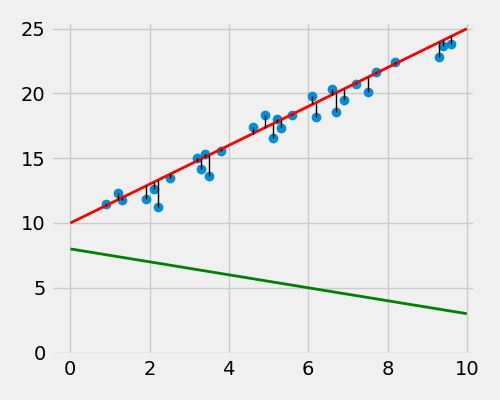

In [16]:
close_prev_figures()
fig, ax = plt.subplots(figsize=(5, 4))
ax.plot(
    x_data, y_data, 'o', 
    x_line_1, y_line_1, 'r-',
    x_line_2, y_line_2, 'g-', linewidth=2,
)
ax.plot(*residuals, linewidth=1)

ax.set_xlim(-0.5, 10.2)
ax.set_ylim(-0.2, 25.5)
plt.tight_layout()
plt.show()

In [17]:
# Define `total_error` loss
def mean_absolute_error(y_true, y_pred):
    
    assert len(y_true) == len(y_pred)
    y_true, y_pred = np.array(y_true), np.array(y_pred)

    return np.abs(y_true - y_pred).sum() / y_true.size

In [18]:
y_pred = linear_model(x_data, w=data_w, b=data_b)
mae_error = mean_absolute_error(y_data, y_pred)
mae_error

0.6426666666666665

In [19]:
y_pred = linear_model(x_data, w=line_2_w, b=line_2_b)
mae_error = mean_absolute_error(y_data, y_pred)
mae_error

11.731333333333335

# Fitting the line

## Simple iterative method

### 2 variables

In [20]:
def fit_line(x, y, learning_rate=0.5, fit_weight=False, fit_bias=False, steps=30):
    if not fit_weight and not fit_bias:
        raise ValueError("At least one of 'fit_weight' or 'fit_bias' must be 'True'!!!")

    best_w = 0
    best_b = 0
    best_y_pred = linear_model(x, w=best_w, b=best_b)
    best_error = mean_absolute_error(y, best_y_pred)

    lr = learning_rate
    increase_weight = True
    increase_bias = True
    history = [[best_w, best_b, best_error]]
    for step in range(steps):
        if fit_weight:
        # Step optimizeing weight
            if increase_weight:
                new_w = best_w + lr
                new_y_pred = linear_model(x_data, w=new_w, b=best_b)
                new_error = mean_absolute_error(y_data, new_y_pred)
                
                if new_error < best_error:
                    best_w = new_w
                    best_error = new_error
                else:
                    increase_weight = False

            else:
                new_w = best_w - lr
                new_y_pred = linear_model(x_data, w=new_w, b=best_b)
                new_error = mean_absolute_error(y_data, new_y_pred)

                if new_error < best_error:
                    best_w = new_w
                    best_error = new_error
                else:
                    increase_weight = True
        
        if fit_bias:
        # Step optimizeing bias
            if increase_bias:
                new_b = best_b + lr
                new_y_pred = linear_model(x_data, w=best_w, b=new_b)
                new_error = mean_absolute_error(y_data, new_y_pred)
                
                if new_error < best_error:
                    best_b = new_b
                    best_error = new_error
                else:
                    increase_bias = False

            else:
                new_b = best_b - lr
                new_y_pred = linear_model(x_data, w=best_w, b=new_b)
                new_error = mean_absolute_error(y_data, new_y_pred)

                if new_error < best_error:
                    best_b = new_b
                    best_error = new_error
                else:
                    increase_bias = True

        # Add updated parameters to the training history
        w_b_error = [round(num, 2) for num in [best_w, best_b, best_error]]
        history.append(w_b_error)
        
    return history

In [21]:
history_b = fit_line(x_data, y_data, fit_bias=True, steps=50)
history_w = fit_line(x_data, y_data, learning_rate=0.2, fit_weight=True)
history_wb = fit_line(x_data, y_data, learning_rate=0.2, fit_weight=True, fit_bias=True, steps=50)

In [22]:
def plot_linear_regression_train_history(history):
    init_step = 0
    x_line = np.array([0, 10])

    steps = list(range(len(history)))
    errors = [h[2] for h in history]
    max_error = max(errors)

    init_w, init_b, init_error = history[init_step]
    init_y_pred = linear_model(x_line, w=init_w, b=init_b)

    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
    data_line, = ax1.plot(x_data, y_data, "o")
    fit_line, = ax1.plot(x_line, init_y_pred)

    error_line, = ax2.plot(steps, errors)
    step_line, = ax2.plot([init_step, init_step], [0, max_error], linewidth=2)

    # SETUP SLIDERS

    # Make room for the sliders
    fig.subplots_adjust(left=0, bottom=0.2)

    # Epoch slider (horizontal).
    w_slider_x = 0.3
    w_slider_y = 0.05
    w_slider_len = 0.6
    w_slider_width = 0.04

    ax_step_slider = fig.add_axes([w_slider_x, w_slider_y, w_slider_len, w_slider_width])
    step_slider = Slider(
        ax=ax_step_slider,
        label='Step',
        valmin=min(steps),
        valmax=max(steps),
        valinit=init_step,
    )

    # The function to be called anytime a slider's value changes
    def update(val):
        step = int(step_slider.val)
        w = history[step][0]
        b = history[step][1]
        fit_line.set_ydata(linear_model(x_line, w=w, b=b))
        step_line.set_xdata([step, step])
        fig.canvas.draw_idle()

    # register the update function with each slider
    step_slider.on_changed(update)

    plt.show()

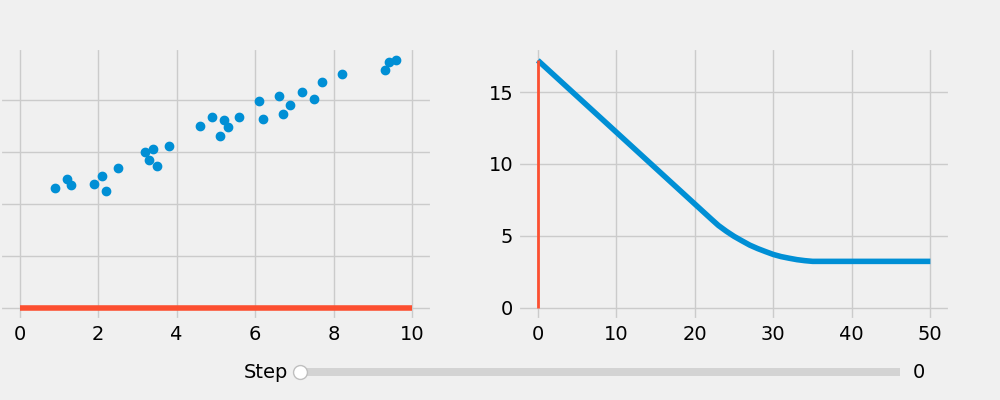

In [25]:
close_prev_figures()
plot_linear_regression_train_history(history_b)

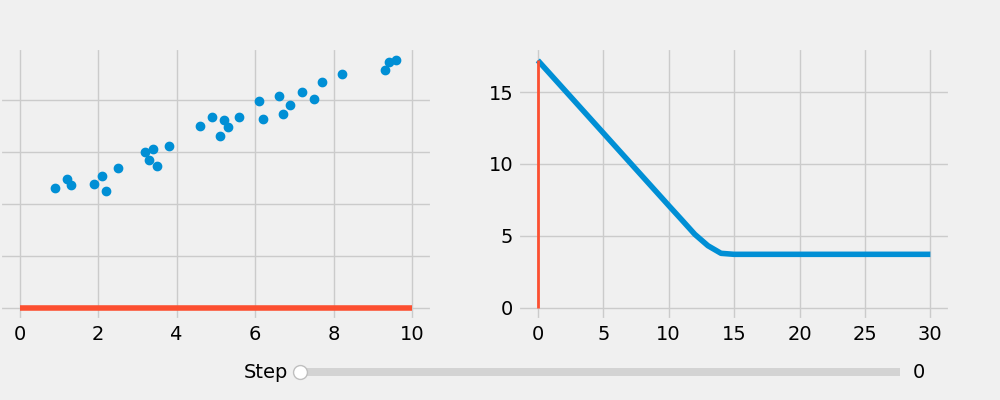

In [27]:
# close_prev_figures()
plot_linear_regression_train_history(history_w)

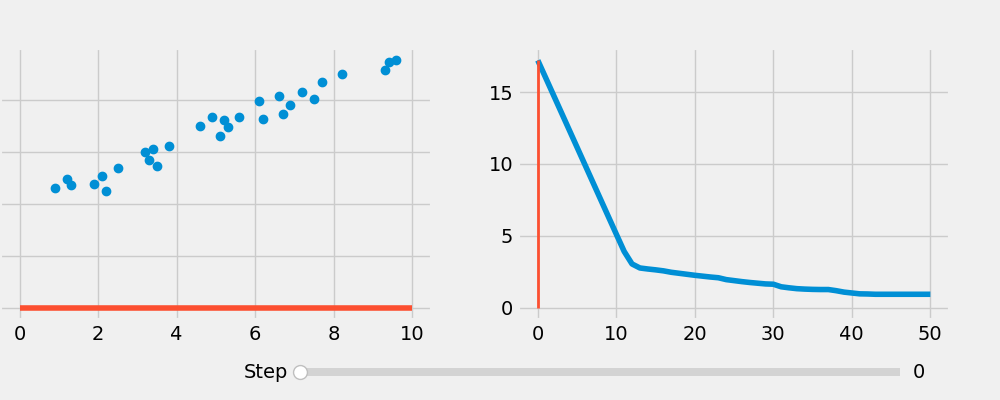

In [58]:
# close_prev_figures()
plot_linear_regression_train_history(history_wb)

In [59]:
def fit_line_dynamic_learning_rate(x, y, init_lr=2, fit_weight=False, fit_bias=False, steps=30):
    if not fit_weight and not fit_bias:
        raise ValueError("At least one of 'fit_weight' or 'fit_bias' must be 'True'!!!")

    best_w = 0
    best_b = 0
    best_y_pred = linear_model(x, w=best_w, b=best_b)
    steps_w_not_improved = 0
    steps_b_not_improved = 0

    best_error = mean_absolute_error(y, best_y_pred)
    lr_w = init_lr
    lr_b = init_lr

    increase_weight = True
    increase_bias = True
    history = [[best_w, best_b, best_error]]
    for step in range(steps):
        if fit_weight:
        # Step optimizeing weight
            if increase_weight:
                new_w = best_w + lr_w
                new_y_pred = linear_model(x_data, w=new_w, b=best_b)
                new_error = mean_absolute_error(y_data, new_y_pred)
                
                if new_error < best_error:
                    best_w = new_w
                    best_error = new_error
                    steps_w_not_improved = 0
                else:
                    increase_weight = False
                    steps_w_not_improved += 1

            else:
                new_w = best_w - lr_w
                new_y_pred = linear_model(x_data, w=new_w, b=best_b)
                new_error = mean_absolute_error(y_data, new_y_pred)

                if new_error < best_error:
                    best_w = new_w
                    best_error = new_error
                    steps_w_not_improved = 0
                else:
                    increase_weight = True
                    steps_w_not_improved += 1
        
        if fit_bias:
        # Step optimizeing bias
            if increase_bias:
                new_b = best_b + lr_b
                new_y_pred = linear_model(x_data, w=best_w, b=new_b)
                new_error = mean_absolute_error(y_data, new_y_pred)
                
                if new_error < best_error:
                    best_b = new_b
                    best_error = new_error
                    steps_b_not_improved = 0
                else:
                    increase_bias = False
                    steps_b_not_improved += 1

            else:
                new_b = best_b - lr_b
                new_y_pred = linear_model(x_data, w=best_w, b=new_b)
                new_error = mean_absolute_error(y_data, new_y_pred)

                if new_error < best_error:
                    best_b = new_b
                    best_error = new_error
                    steps_b_not_improved = 0
                else:
                    increase_bias = True
                    steps_b_not_improved += 1
        
        if steps_w_not_improved >= 2:
            lr_w /= 2
            steps_w_not_improved = 0

        if steps_b_not_improved >= 2:
            lr_b /= 2
            steps_b_not_improved = 0

        # Add updated parameters to the training history
        w_b_error = [round(num, 2) for num in [best_w, best_b, best_error]]
        history.append(w_b_error)
        
    return history

In [60]:
history_w = fit_line_dynamic_learning_rate(x_data, y_data, fit_weight=True)
history_b = fit_line_dynamic_learning_rate(x_data, y_data, fit_bias=True)
history_wb = fit_line_dynamic_learning_rate(x_data, y_data, fit_weight=True, fit_bias=True)

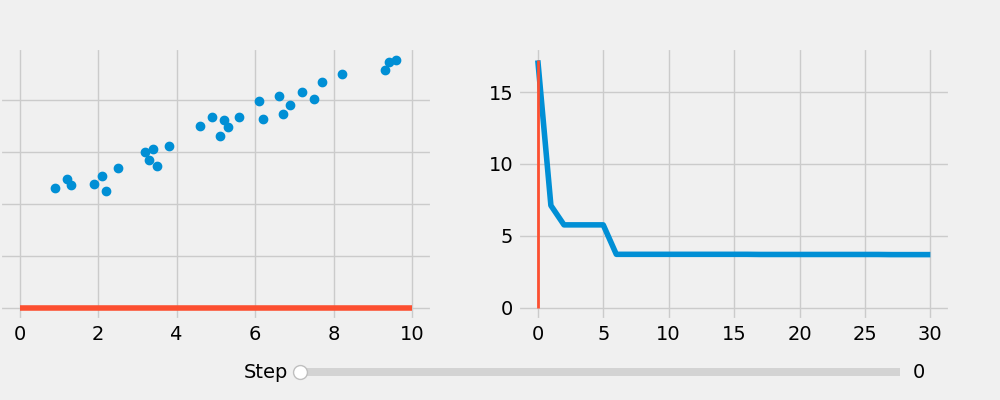

In [61]:
plot_linear_regression_train_history(history_w)

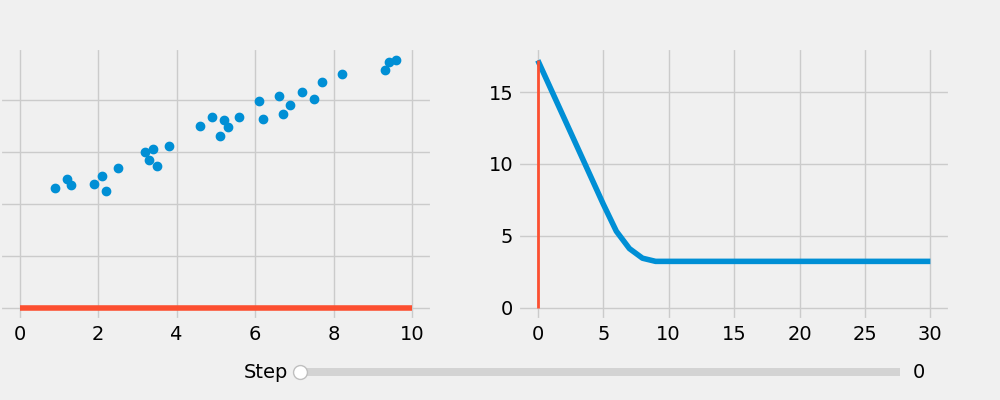

In [62]:
plot_linear_regression_train_history(history_b)

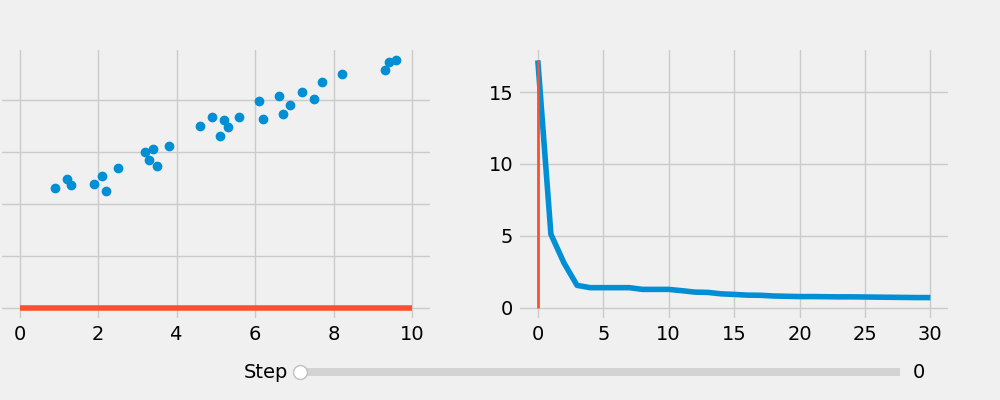

In [65]:
plot_linear_regression_train_history(history_wb)

In [66]:
# Refactor `fit_line_dynamic_learning_rate` into a class
def bool_to_sign(bool_val: bool):
        """Return 1 if `bool_val` is True and -1 if `bool_val` is False."""
        # return bool_val if bool_val else -1
        return 1 - 2 * bool_val

class FitLineBasic:
    def __init__(self, learning_rate=1):
        # Initialize parameters
        self.w = 0
        self.b = 0
        self.lr_w = learning_rate
        self.lr_b = learning_rate
        self.increase_weight = True
        self.increase_bias = True
        self.history = []

    def change_param_direction(self, name):

        if name == 'weight':
            self.increase_weight = not self.increase_weight

        elif name == 'bias':
            self.increase_bias = not self.increase_bias

        else:
            raise ValueError(f"Invalid value of argument `name`, \
                             expected values: 'weight', 'bias'. Received - {name}")
    
    def linear_model(self, x: np.ndarray, w=None, b=None):

        w = w if w is not None else self.w
        b = b if b is not None else self.b

        return x * w + b
    
    
    def fit(self, x, y, steps=30, fit_weight=False, fit_bias=False): # fit_parameters=['w', 'b']
        if not fit_weight and not fit_bias:
            raise ValueError("At least one of 'fit_weight' or 'fit_bias' must be 'True'!!!")
        
        steps_w_not_improved = 0
        steps_b_not_improved = 0

        y_pred = self.linear_model(x)
        error = mean_absolute_error(y, y_pred)

        self.history.append([self.w, self.b, error])

        for step in range(steps):
            if fit_weight:
                lr_sign = bool_to_sign(self.increase_weight)
                new_w = self.w  + lr_sign * self.lr_w
                y_pred = self.linear_model(x, w=new_w)
                new_error = mean_absolute_error(y, y_pred)

                if new_error < error:
                    self.w = new_w
                    error = new_error
                    steps_w_not_improved = 0
                else:
                    self.change_param_direction('weight')
                    steps_w_not_improved += 1

            if fit_bias:
                lr_sign = bool_to_sign(self.increase_bias)
                new_b = self.b  + lr_sign * self.lr_b
                y_pred = self.linear_model(x, b=new_b)
                new_error = mean_absolute_error(y, y_pred)

                if new_error < error:
                    self.b = new_b
                    error = new_error
                    steps_b_not_improved = 0
                else:
                    self.change_param_direction('bias')
                    steps_b_not_improved += 1

            if steps_w_not_improved >= 2:
                self.lr_w /= 2
                steps_w_not_improved = 0

            if steps_b_not_improved >= 2:
                self.lr_b /= 2
                steps_b_not_improved = 0

            # Add updated parameters to the training history
            w_b_error = [round(num, 2) for num in [self.w, self.b, error]]
            self.history.append(w_b_error)

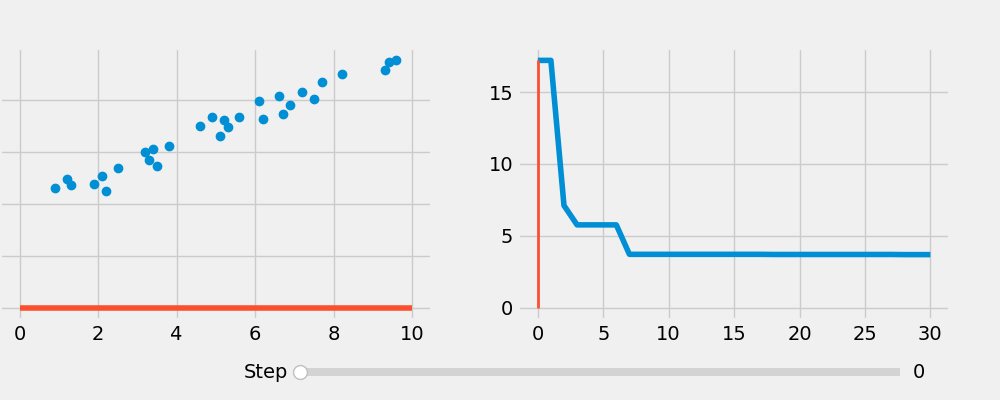

In [67]:
clf = FitLineBasic(learning_rate=2)
clf.fit(x_data, y_data, fit_weight=True)
history_w = clf.history

plot_linear_regression_train_history(history_w)

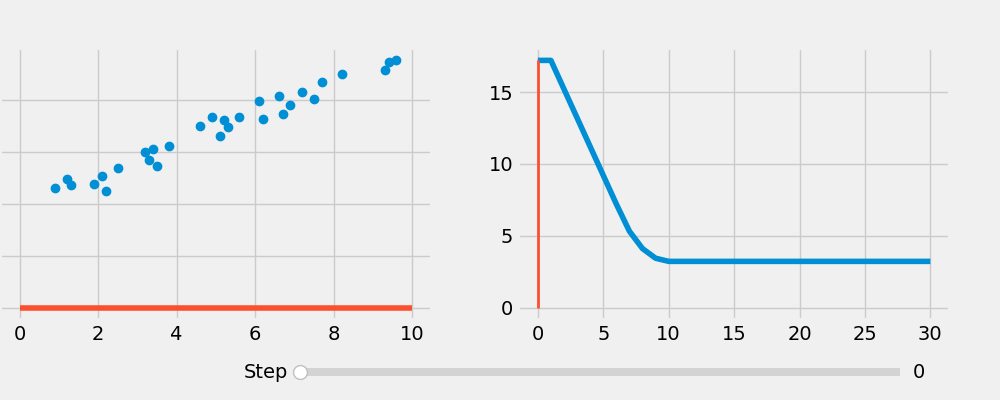

In [69]:
clf = FitLineBasic(learning_rate=2)
clf.fit(x_data, y_data, fit_bias=True)
history_b = clf.history

plot_linear_regression_train_history(history_b)

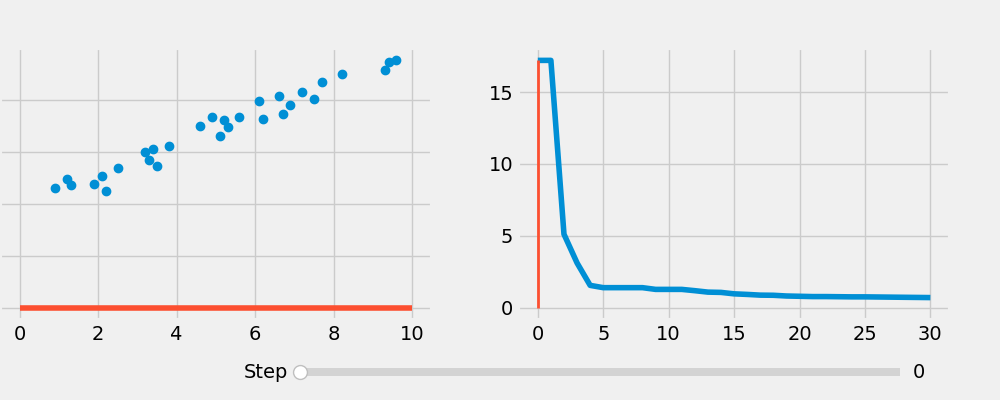

In [72]:
clf = FitLineBasic(learning_rate=2)
clf.fit(x_data, y_data, fit_weight=True, fit_bias=True)
history_wb = clf.history

plot_linear_regression_train_history(history_wb)

### 3 Variables

## Using `Gradient Descent`